# <center><font color='red'>PUBG Game Prediction</font></center>

<center><img src ="https://camo.githubusercontent.com/4ae823b95ca87783de140bb114f1286101a59a331860d2a5a619567e8b4292ee/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f5856627258343333766e3672716b6578536a2f67697068792e676966"></center

### Table Points
1. [Importing Liabraries](#import)
2. [Reading Data](#read)
3. [Data wrangling](#wrangling)
4. [Feature Engineering](#feature)
5. [CatBoost Model](#cat)
   

## **Import Liabraries**<a class ="anchor" id ="import"></a>

In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,6)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv


### Reading the Data <a class = "anchor" id ="read"></a>

In [45]:
## load the data
df = pd.read_csv('/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv')

In [46]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [47]:
df.shape

(4446966, 29)

In [48]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


## **Data Wrangling**<a class ="anchor" id ="wrangling"></a>

### Check for rows with missing win value

In [49]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [50]:
df.drop(2744604,inplace=True)

In [51]:
df['winPlacePerc'].isnull().sum()

0

### Understanding Players distribution in a game

In [52]:
df['players_joined'] =  df.groupby('matchId')['matchId'].transform('count')

In [53]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_joined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


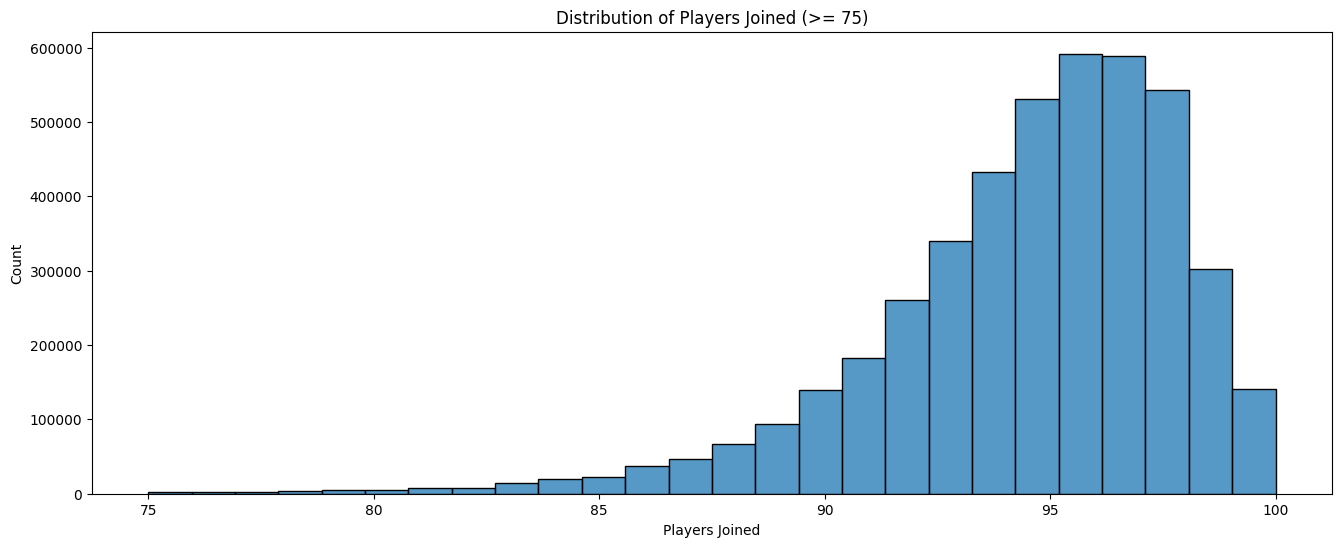

In [54]:
filtered_df = df[df['players_joined'] >= 75]
sns.histplot(filtered_df['players_joined'],kde=False,bins=26)
plt.xlabel('Players Joined')
plt.ylabel('Count')
plt.title('Distribution of Players Joined (>= 75)')
plt.show()

### Analysing Data

#### Kills Without Moving

In [55]:
## prepare data parameter to gather information of total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

## prepare data parameter to check for anomoly detection that person not moved but still managed to kill
df['killwithoutmove'] = (df['kills']>0) & (df['totalDistance']==0)

In [56]:
df[df['killwithoutmove']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_joined,totalDistance,killwithoutmove
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [57]:
df[df['killwithoutmove']==True].shape

(1535, 32)

In [58]:
df.drop(df[df['killwithoutmove']==True].index,inplace=True)

#### Extra ordinary Road kills

In [59]:
df[df['roadKills'] > 5].shape

(46, 32)

In [60]:
df.drop(df[df['roadKills']> 5].index,inplace=True)

#### So many Kills -how??

<center><img src ="https://camo.githubusercontent.com/291b6b0cbd0a7d3e62f83639690b932ab468fdc8e8b3f3a5a3cd2733a1c38400/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f336f784851667a4268704b746764445774572f67697068792e676966"></center>

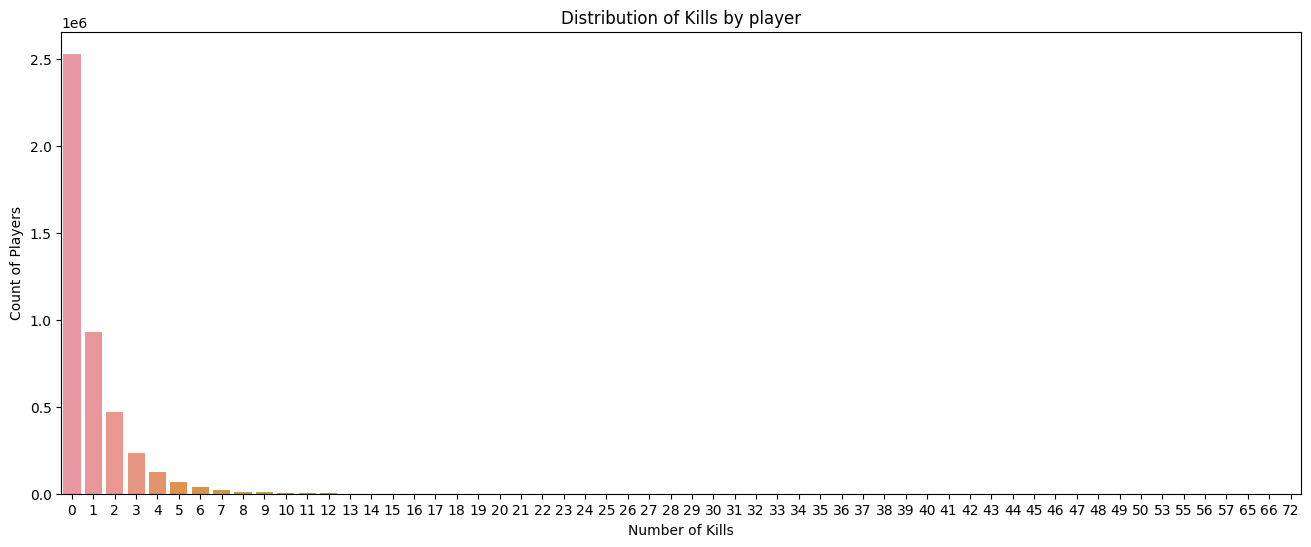

In [61]:
sns.countplot(data=df,x=df['kills']).set_title("Distribution of Kills by player")
plt.xlabel('Number of Kills')
plt.ylabel('Count of Players')
plt.show()

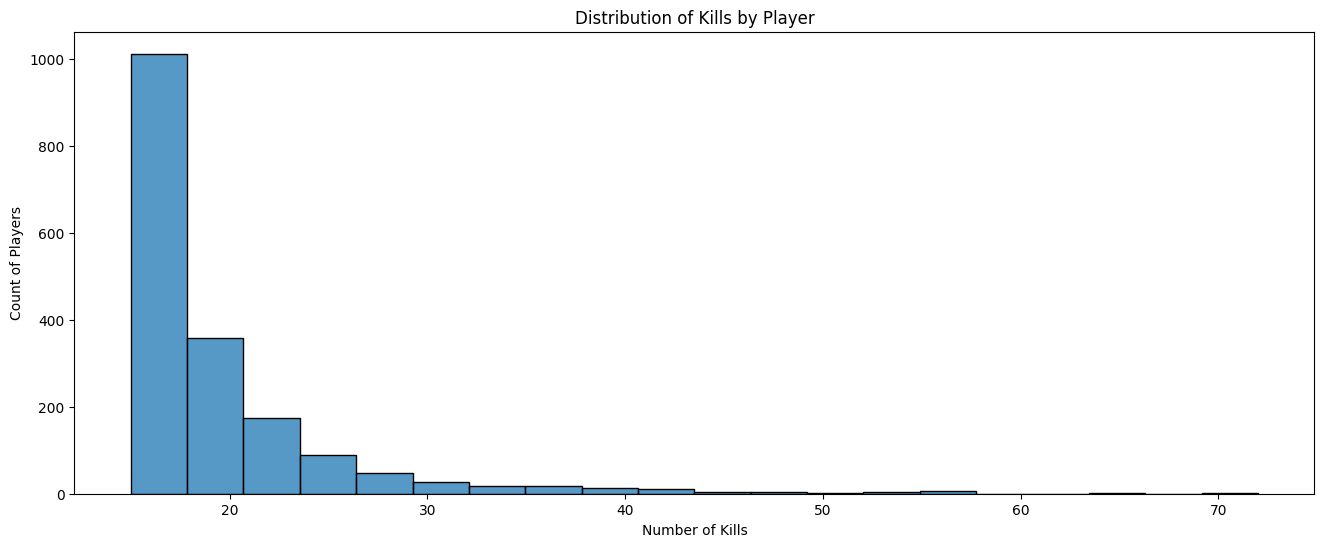

In [62]:
# sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of Kills by player")
# plt.xlabel('Number of Kills')
# plt.ylabel('Count of Players')
# plt.show()

filtered_df = df[df['kills'] >= 15]

# Plot the histogram
sns.histplot(filtered_df['kills'], bins=20, kde=False)
plt.title("Distribution of Kills by Player")
plt.xlabel('Number of Kills')
plt.ylabel('Count of Players')
plt.show()

In [63]:
## data dimension
df[df['kills']>20].shape

(417, 32)

In [64]:
## drop the instances
df.drop(df[df['kills']>20].index,inplace=True)

#### Head shot

<center><img src ="https://camo.githubusercontent.com/43af5bd43631ea8b35a919bbec1c6cb108313d937374371d640223ba5952aab7/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f6c336d5a724f616a7a3556435a663748792f67697068792e676966"></center>

In [65]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

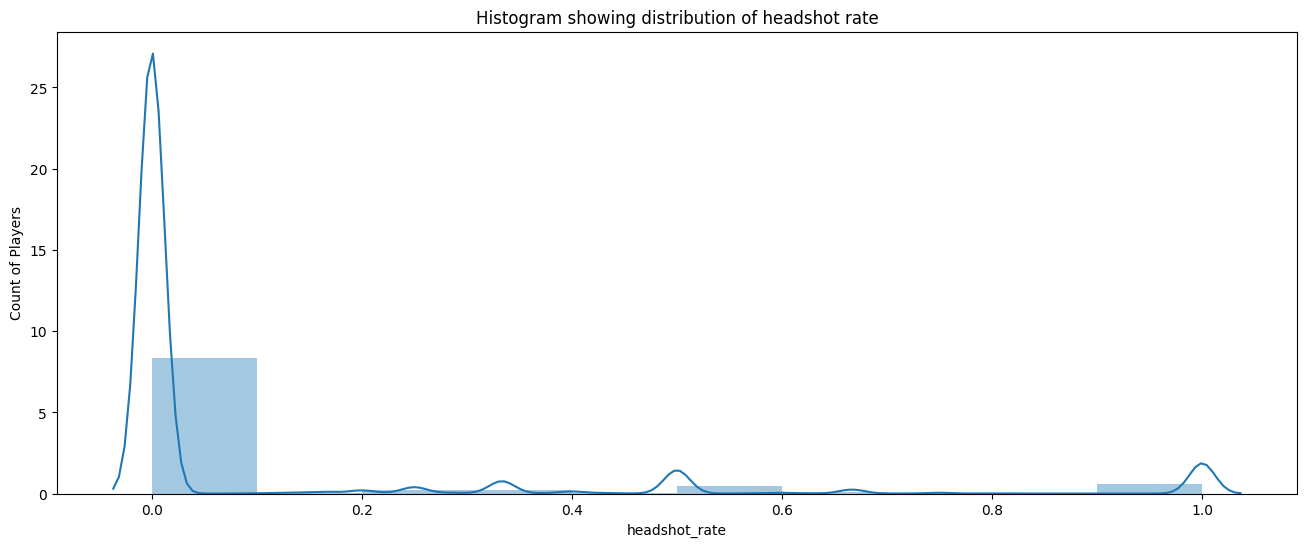

In [66]:
## plot the headshot rate distribution
sns.distplot(df['headshot_rate'],bins=10).set_title('Histogram showing distribution of headshot rate')
plt.ylabel('Count of Players')
plt.show()

In [67]:
df[(df['headshot_rate']==1) & (df['kills']>5)].shape

(187, 33)

In [68]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index,inplace=True)

#### Longest shot

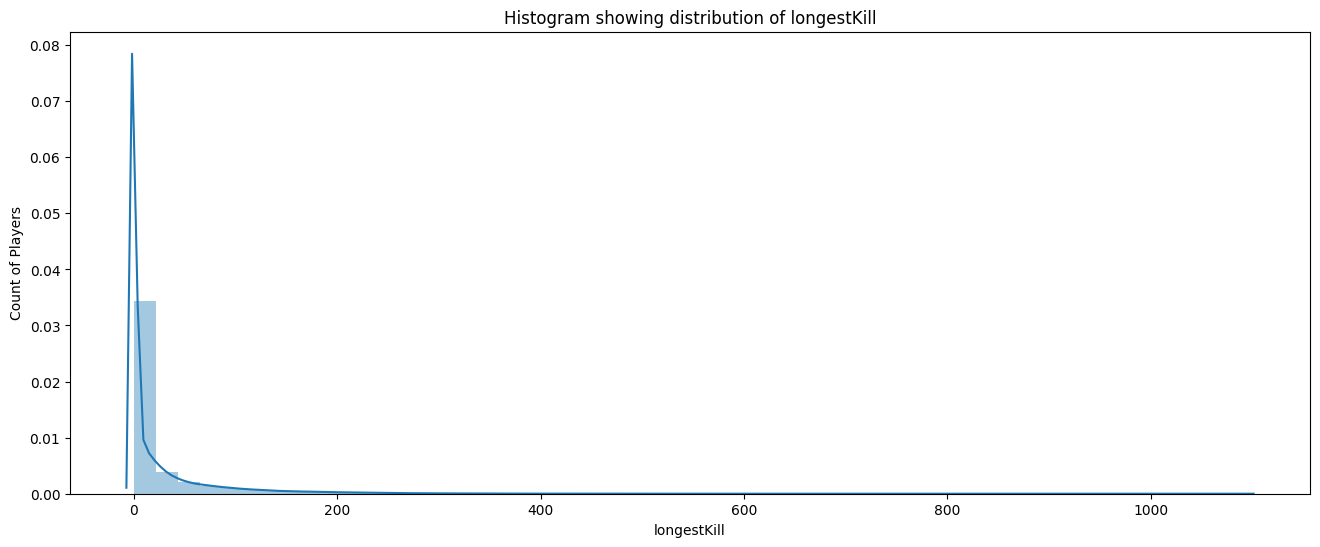

In [69]:
sns.distplot(df['longestKill'],bins=50).set_title('Histogram showing distribution of longestKill')
plt.ylabel('Count of Players')
plt.show()

In [70]:
df[df['longestKill']>=500].shape

(1738, 33)

In [71]:
df.drop(df[df['longestKill']>500].index,inplace=True)

#### Weapon change

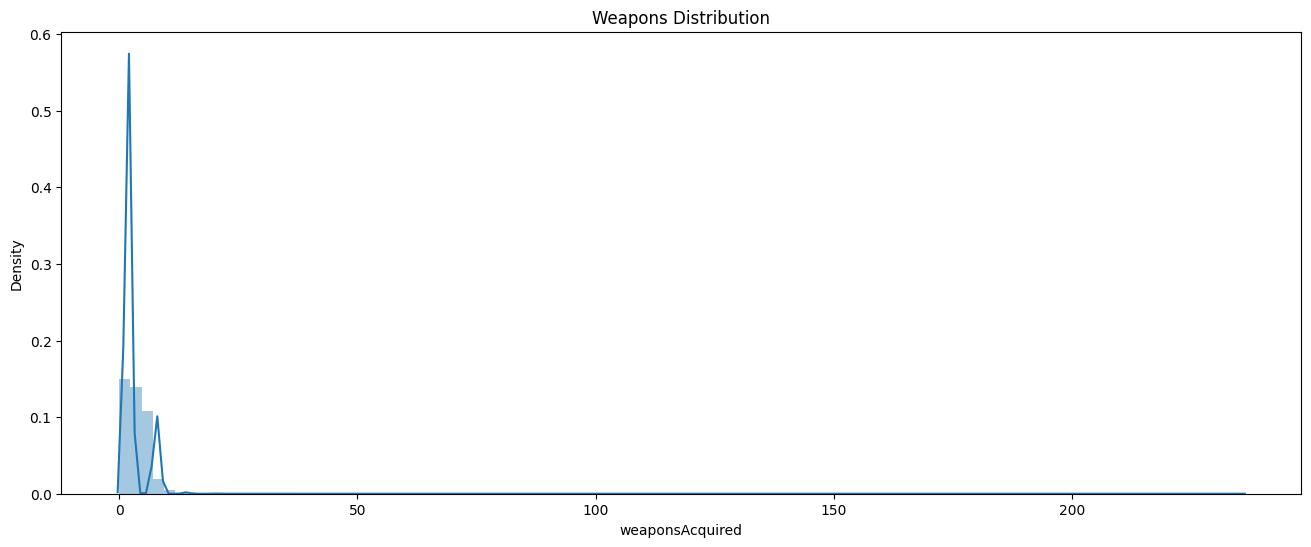

In [72]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title('Weapons Distribution')
plt.show()

In [73]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [74]:
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

### EDA

In [75]:
df.shape

(4436235, 33)

In [76]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_joined,totalDistance,killwithoutmove,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0


In [77]:
df.shape

(4436235, 33)

In [78]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'players_joined',
       'totalDistance', 'killwithoutmove', 'headshot_rate'],
      dtype='object')

In [79]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
players_joined     0
totalDistance      0
killwithoutmove    0
headshot_rate      0
dtype: int64

<Axes: >

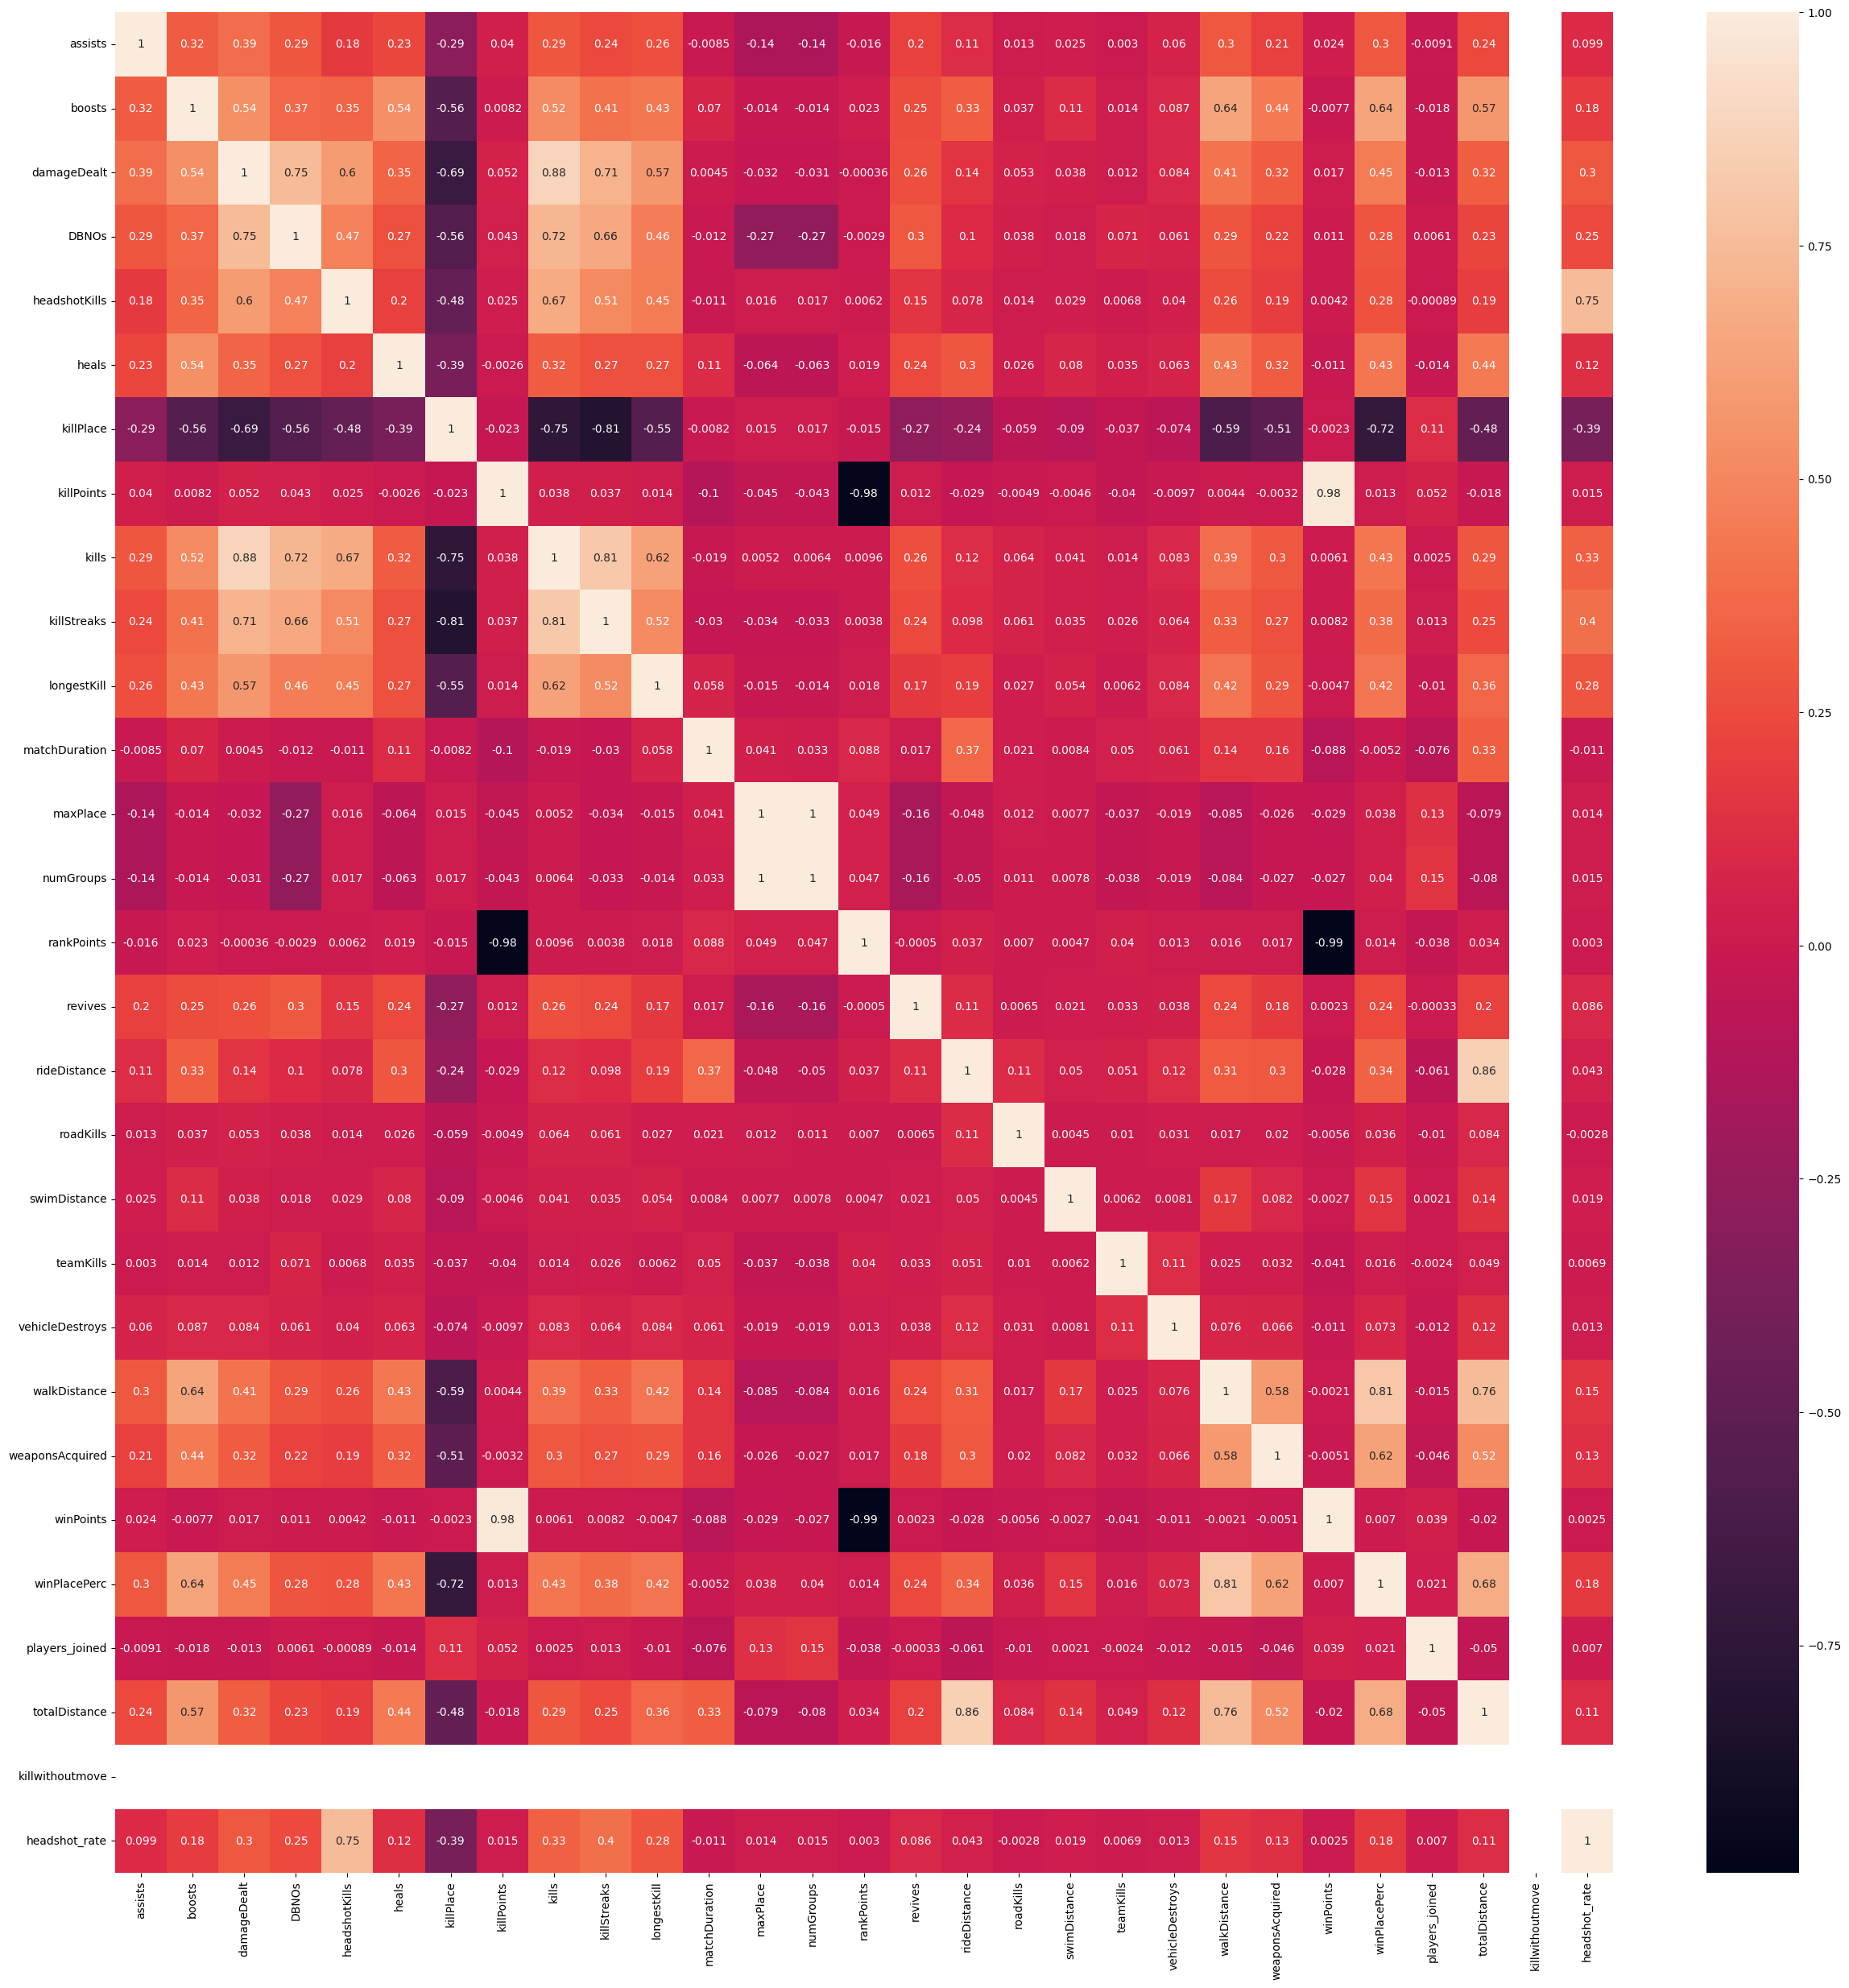

In [80]:
## correlation of parameter with Win Predictions
data_corr = df.corr(numeric_only=True)
plt.figure(figsize=(30,30))
sns.heatmap(data=data_corr,annot=True)

## **Feature Engineering**<a class ="anchor" id ="feature"></a>

In [81]:
## Normalization
normalize = (100 - df['players_joined']/100)+1
df['killsNorm'] = df['kills'] * normalize
df['damageNorm'] = df['damageDealt'] * normalize
df['maxPlaceNorm'] = df['maxPlace'] * normalize
df['matchNorm'] = df['matchDuration'] * normalize

df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsBoost'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [82]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'players_joined',
       'totalDistance', 'killwithoutmove', 'headshot_rate', 'killsNorm',
       'damageNorm', 'maxPlaceNorm', 'matchNorm', 'traveldistance',
       'healsBoost', 'assist'],
      dtype='object')

In [83]:
data = df.drop(columns=['Id','groupId','matchId','assists','boosts','walkDistance','swimDistance','rideDistance','heals','revives','kills','damageDealt','maxPlace','matchDuration'])

In [84]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killwithoutmove,headshot_rate,killsNorm,damageNorm,maxPlaceNorm,matchNorm,traveldistance,healsBoost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


## **CatBoost Model**<a class ="anchor" id ="cat"></a>

#### Handling categorical data

In [103]:
x = data.drop(['winPlacePerc'],axis=1)
y = data['winPlacePerc']

In [ ]:
x = pd.get_dummies(x,columns=['matchType','killwithoutmove'])

In [88]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killwithoutmove_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [105]:
x.shape

(4436235, 40)

In [107]:
x.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'players_joined',
       'totalDistance', 'headshot_rate', 'killsNorm', 'damageNorm',
       'maxPlaceNorm', 'matchNorm', 'traveldistance', 'healsBoost', 'assist',
       'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killwithoutmove_False'],
      dtype='object')

In [108]:
features = x.columns

In [89]:
data['matchType'].value_counts()

matchType
squad-fpp           1754742
duo-fpp              996001
squad                625292
solo-fpp             536212
duo                  313185
solo                 181456
normal-squad-fpp      13073
crashfpp               6274
normal-duo-fpp         5003
flaretpp               2497
normal-solo-fpp         845
flarefpp                717
crashtpp                367
normal-squad            305
normal-duo              144
normal-solo             122
Name: count, dtype: int64

In [90]:
x.shape

(4436235, 40)

#### Scaling data

In [91]:
x.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'players_joined',
       'totalDistance', 'headshot_rate', 'killsNorm', 'damageNorm',
       'maxPlaceNorm', 'matchNorm', 'traveldistance', 'healsBoost', 'assist',
       'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killwithoutmove_False'],
      dtype='object')

In [92]:
sc= StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [93]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582948,-0.384165,0.449325,1.172490,-0.765121,-0.459618,-0.732885,-1.212390,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459618,-0.775859,0.803565,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
2,-0.582948,-0.384165,-0.024271,-0.804728,-0.765121,-0.459618,0.169559,0.813067,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,-0.808944,0.0
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459618,-0.560991,0.700391,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405065,1.236180,0.0
4,-0.582948,-0.384165,-0.097132,-0.804728,0.647736,0.727483,2.232288,0.906738,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696903,-0.405065,-0.808944,0.0


### Spliiting Data

In [94]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size = 0.3,random_state=0)

In [95]:
print(x_train.shape , y_train.shape)
print(x_test.shape ,y_test.shape)

(3105364, 40) (3105364,)
(1330871, 40) (1330871,)


### CatBoost Model

In [96]:
import catboost as cb

In [97]:
train_dataset = cb.Pool(x_train,y_train)
test_dataset = cb.Pool(x_test,y_test)

In [117]:
model = cb.CatBoostRegressor(loss_function = 'RMSE')

In [ ]:
## Grid Search
grid = {'iterations':[100,150],
        'learning_rate':[0.03,0.1],
        'depth':[2,8]}
model.grid_search(grid,train_dataset)

0:	learn: 0.5481978	test: 0.5482418	best: 0.5482418 (0)	total: 234ms	remaining: 23.1s
1:	learn: 0.5333612	test: 0.5334076	best: 0.5334076 (1)	total: 444ms	remaining: 21.8s
2:	learn: 0.5189836	test: 0.5190332	best: 0.5190332 (2)	total: 692ms	remaining: 22.4s
3:	learn: 0.5050583	test: 0.5051093	best: 0.5051093 (3)	total: 912ms	remaining: 21.9s
4:	learn: 0.4915911	test: 0.4916428	best: 0.4916428 (4)	total: 1.12s	remaining: 21.3s
5:	learn: 0.4785596	test: 0.4786087	best: 0.4786087 (5)	total: 1.32s	remaining: 20.8s
6:	learn: 0.4659781	test: 0.4660310	best: 0.4660310 (6)	total: 1.53s	remaining: 20.4s
7:	learn: 0.4537725	test: 0.4538275	best: 0.4538275 (7)	total: 1.75s	remaining: 20.1s
8:	learn: 0.4419738	test: 0.4420278	best: 0.4420278 (8)	total: 1.95s	remaining: 19.7s
9:	learn: 0.4305932	test: 0.4306467	best: 0.4306467 (9)	total: 2.15s	remaining: 19.4s
10:	learn: 0.4195916	test: 0.4196472	best: 0.4196472 (10)	total: 2.42s	remaining: 19.6s
11:	learn: 0.4088809	test: 0.4089371	best: 0.4089371

In [125]:
feature_imp_df = pd.DataFrame()
feature_imp_df['features'] = features
feature_imp_df['importance'] = model.feature_importances_ 
feature_imp_df = feature_imp_df.sort_values(by=['importance'],ascending=False)

In [126]:
feature_imp_df 

,features,importance
2,killPlace,39.978654
14,totalDistance,13.664372
20,traveldistance,12.209549
16,killsNorm,9.833018
4,killStreaks,5.195377
19,matchNorm,5.037341
13,players_joined,4.626361
6,numGroups,2.039776
5,longestKill,1.881332
21,healsBoost,1.804464


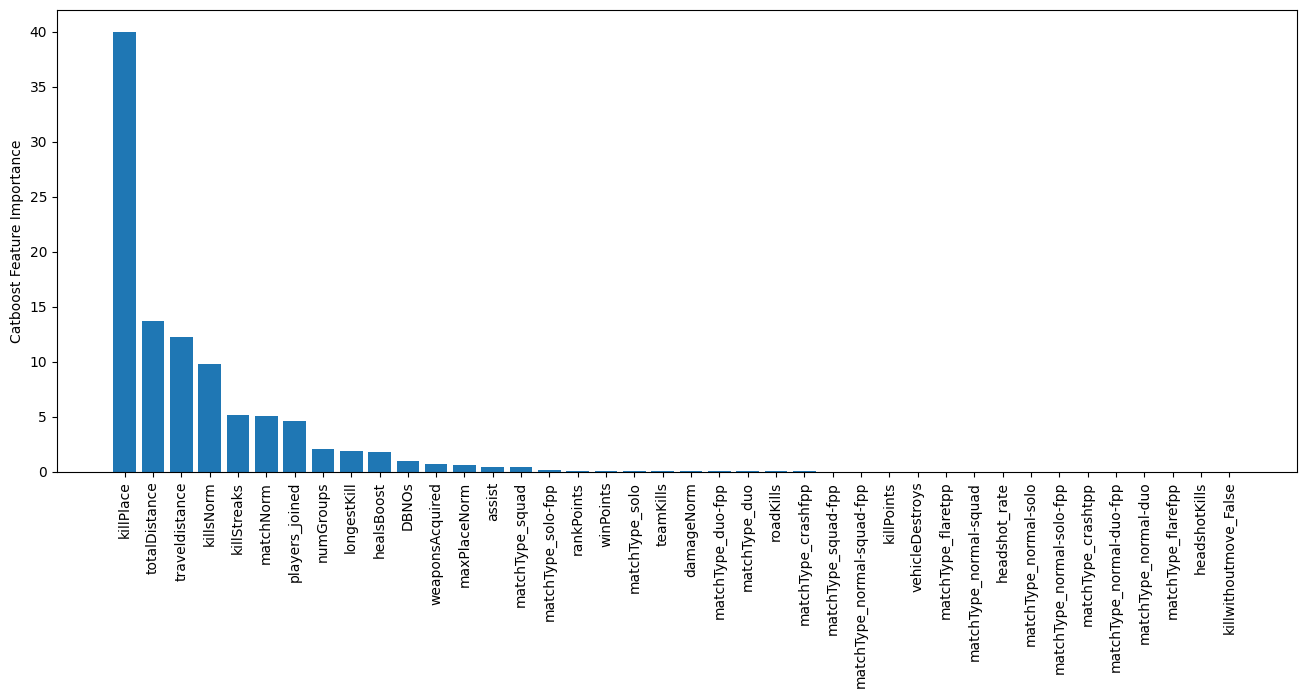

In [128]:
plt.bar(feature_imp_df['features'],feature_imp_df['importance'])
plt.ylabel('Catboost Feature Importance')
plt.xticks(rotation=90)
plt.show()

### Prediction

In [130]:
pred = model.predict(x_test)
pred

array([0.2316378 , 0.88345057, 0.84555107, ..., 0.78692761, 0.5150027 ,
       0.73476839])

In [131]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print("Testing performance")
print("RMSE:{:.2f}".format(rmse))
print("R2:{:.2f}".format(r2))

      

Testing performance
RMSE:0.08
R2:0.93


<center><img src ="https://camo.githubusercontent.com/172a8a84b2e67e390522a3db8db63da53c917493f8f6f3aac3f05d43c7cc4be7/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f4b423839644d4174483739564976784e43572f67697068792e676966"></center>